# 1.&nbsp;GTZAN Dataset

GDrive Mount

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Import & data load

In [ ]:
import numpy as np
import pandas as pd
import os

import sklearn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.feature_selection import RFE
from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.filterwarnings('ignore')

In [ ]:
feature_data = pd.read_csv('/content/drive/MyDrive/GoogleCollab/Data/GTZAN/features_3_sec.csv')
feature_data.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [ ]:
feature_data = feature_data.iloc[0:, 1:]
feature_data

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,66149,0.349126,0.080515,0.050019,0.000097,1499.083005,164266.886443,1718.707215,85931.574523,3015.559458,...,42.485981,-9.094270,38.326839,-4.246976,31.049839,-5.625813,48.804092,1.818823,38.966969,rock
9986,66149,0.372564,0.082626,0.057897,0.000088,1847.965128,281054.935973,1906.468492,99727.037054,3746.694524,...,32.415203,-12.375726,66.418587,-3.081278,54.414265,-11.960546,63.452255,0.428857,18.697033,rock
9987,66149,0.347481,0.089019,0.052403,0.000701,1346.157659,662956.246325,1561.859087,138762.841945,2442.362154,...,78.228149,-2.524483,21.778994,4.809936,25.980829,1.775686,48.582378,-0.299545,41.586990,rock
9988,66149,0.387527,0.084815,0.066430,0.000320,2084.515327,203891.039161,2018.366254,22860.992562,4313.266226,...,28.323744,-5.363541,17.209942,6.462601,21.442928,2.354765,24.843613,0.675824,12.787750,rock


Preprocessing & Scaling

In [ ]:
X, y = feature_data.loc[:, feature_data.columns != 'label'], feature_data['label']

scaler = preprocessing.MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X = pd.DataFrame(X_scaled, columns=X.columns)
X

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.0,0.355399,0.716757,0.293133,0.107955,0.262173,0.034784,0.459205,0.094130,0.346153,...,0.363613,0.056198,0.397172,0.066062,0.371828,0.055344,0.380831,0.026797,0.506746,0.047781
1,0.0,0.367322,0.670347,0.253040,0.044447,0.270969,0.018716,0.470831,0.052261,0.363722,...,0.468596,0.092912,0.351681,0.074001,0.362068,0.076365,0.418452,0.082414,0.593029,0.065548
2,0.0,0.373159,0.728067,0.296753,0.141663,0.265293,0.023073,0.494051,0.059922,0.378215,...,0.479681,0.096704,0.420979,0.050639,0.400536,0.067509,0.433742,0.043841,0.546264,0.036062
3,0.0,0.399349,0.677066,0.298024,0.075042,0.238427,0.023187,0.455246,0.066234,0.329587,...,0.386258,0.067995,0.387474,0.050617,0.380430,0.050030,0.405824,0.041898,0.562204,0.034873
4,0.0,0.355668,0.689113,0.322308,0.052149,0.233460,0.016451,0.451651,0.047830,0.318453,...,0.438567,0.042500,0.460314,0.083860,0.388590,0.076524,0.409019,0.020763,0.517913,0.031713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,0.0,0.376757,0.617031,0.111106,0.002984,0.206932,0.034101,0.380041,0.068680,0.266983,...,0.494342,0.060299,0.302553,0.069546,0.285713,0.044089,0.371046,0.040116,0.536263,0.042502
9986,0.0,0.413243,0.637013,0.128944,0.002687,0.277274,0.058465,0.438552,0.079860,0.349793,...,0.438282,0.045545,0.249505,0.122777,0.305915,0.081395,0.263338,0.052963,0.516365,0.020232
9987,0.0,0.374196,0.697548,0.116503,0.021500,0.176099,0.138139,0.331163,0.111494,0.202062,...,0.391617,0.112660,0.408760,0.038190,0.442668,0.035995,0.496892,0.039921,0.505937,0.045380
9988,0.0,0.436537,0.657745,0.148266,0.009825,0.324968,0.042367,0.473422,0.017567,0.413964,...,0.469334,0.039551,0.362864,0.029532,0.471308,0.028749,0.506738,0.019101,0.519900,0.013740


Test/Train Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Modeling

In [ ]:
models = {
    "SGD": SGDClassifier(max_iter=5000, random_state=0),
    "LG": LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial'),
    "NN": MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1),
    "ADA": AdaBoostClassifier(n_estimators=1000),
    "KNN": KNeighborsClassifier(),
    "LDA": LinearDiscriminantAnalysis(),
    "NB": GaussianNB(),
    "TREE": DecisionTreeClassifier(),
    "RF": RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0),
    "SVM": SVC(gamma='scale'),
    "PERC": Perceptron(max_iter=2000),
 }


def model_classification(model, X_train, y_train, X_test, y_test):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  print('Accuracy of', str(model), ':', round(accuracy_score(y_test, y_pred), 3), '\n')

In [ ]:
for model in models:
  model_classification(models.get(model), X_train, y_train)

Accuracy of SGDClassifier(max_iter=5000, random_state=0) : 0.637 

Accuracy of LogisticRegression(multi_class='multinomial', random_state=0) : 0.7 

Accuracy of MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5000, 10), random_state=1,
              solver='lbfgs') : 0.676 

Accuracy of AdaBoostClassifier(n_estimators=1000) : 0.439 

Accuracy of KNeighborsClassifier() : 0.9 

Accuracy of LinearDiscriminantAnalysis() : 0.673 

Accuracy of GaussianNB() : 0.519 

Accuracy of DecisionTreeClassifier() : 0.633 

Accuracy of RandomForestClassifier(max_depth=10, n_estimators=1000, random_state=0) : 0.815 

Accuracy of SVC() : 0.751 

Accuracy of Perceptron(max_iter=2000) : 0.54 



In [ ]:
top_3_classifiers = ["KNN", "RF", "SVM"]
kf = KFold(n_splits=10, shuffle=True, random_state=42)

for model in top_3_classifiers:
  cv_score = cross_val_score(models.get(model), X, y, cv=kf, scoring='accuracy')
  print('Accuracy of', str(model), ':', round(np.mean(cv_score), 3), '\n')

Accuracy of KNN : 0.912 

Accuracy of RF : 0.813 

Accuracy of SVM : 0.758 



#1.1&nbsp;Neural Networks using MEL Spectograms

In [ ]:
import tensorflow
import os
import cv2
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.optimizers import Adam

Create MEL spectograms and save them as image files

In [ ]:
dataset_path = '/content/drive/MyDrive/GoogleCollab/Data/GTZAN/genres_original'
save_path = '/content/drive/MyDrive/GoogleCollab/Data/GTZAN/spectrograms'

In [ ]:
hop_length = 256
n_fft = 1024
n_mels = 128

In [ ]:
def generate_mel_spectrogram(file_path, save_path):
    y, sr = librosa.load(file_path)

    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, hop_length=hop_length, n_mels=n_mels)

    mel_spec_db = librosa.amplitude_to_db(mel_spec, ref=np.max)

    plt.figure(figsize=(6, 4))
    librosa.display.specshow(mel_spec_db, x_axis='time', y_axis='mel', sr=sr, hop_length=hop_length)
    plt.axis('off')
    plt.savefig(save_path)

    temp_save_path = "temp_spectrogram.png"
    plt.savefig(temp_save_path, bbox_inches='tight', pad_inches=0)
    plt.close()

    img = cv2.imread(temp_save_path, cv2.IMREAD_UNCHANGED)
    non_white_pixels = np.any(img[:, :, :3] < 255, axis=-1)
    coords = np.argwhere(non_white_pixels)
    x0, y0 = coords.min(axis=0)
    x1, y1 = coords.max(axis=0) + 1

    cropped_img = img[x0:x1, y0:y1]
    cv2.imwrite(save_path, cropped_img)

    os.remove(temp_save_path)

In [ ]:
os.makedirs(save_path, exist_ok=True)

for genre in os.listdir(dataset_path):
    genre_path = os.path.join(save_path, genre)
    os.makedirs(genre_path, exist_ok=True)

In [ ]:
for genre_label, genre in enumerate(os.listdir(dataset_path)):
    genre_path = os.path.join(dataset_path, genre)
    for filename in os.listdir(genre_path):
      if filename != 'jazz.00054.wav':
        file_path = os.path.join(genre_path, filename)
        save_file_path = os.path.join(save_path, genre, f"{filename.replace('.wav', '.png')}")
        generate_mel_spectrogram(file_path, save_file_path)

Load spectogram images

In [ ]:
spectogram_data = '/content/drive/MyDrive/GoogleCollab/Data/GTZAN/spectrograms'

In [ ]:
X, y, classes = [], [], []

for label, genre in enumerate(os.listdir(spectogram_data)):
    classes.append(genre)
    genre_path = os.path.join(spectogram_data, genre)

    if os.path.isdir(genre_path):
        for img_file in os.listdir(genre_path):
            img_path = os.path.join(genre_path, img_file)

            if os.path.isfile(img_path):
                img = load_img(img_path, color_mode='grayscale')
                img_array = img_to_array(img)
                X.append(img_array)
                y.append(genre)

X = np.array(X)
y = np.array(y)

np.save('X.npy', X)
np.save('y.npy', y)

print(X.shape, y.shape, classes)

(991, 308, 465, 1) (991,) ['reggae', 'blues', 'metal', 'country', 'rock', 'hiphop', 'classical', 'jazz', 'disco', 'pop']


In [ ]:
X = np.load('X.npy')
y = np.load('y.npy')

Encode labels

In [ ]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_onehot = to_categorical(y_encoded)
print(y_onehot.shape)

(991, 10)


Split data into test & train sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42, shuffle=True)
print(X_train.shape, X_test.shape, y_test.shape)

(792, 308, 465, 1) (199, 308, 465, 1) (199, 10)


Build Neural Network model

In [ ]:
model = Sequential()
model.add(Conv2D(64, 2, activation = 'relu', input_shape = X.shape[1:]))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.1))
model.add(Conv2D(128, 2, activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.1))
model.add(Conv2D(256, 2, activation = 'relu'))
model.add(MaxPooling2D(pool_size = (4,4)))
model.add(Dropout(0.1))
model.add(Conv2D(512, 2, activation = 'relu'))
model.add(MaxPooling2D(pool_size = (8,8)))
model.add(Dropout(0.1))

model.add(Flatten())

model.add(Dense(2048, activation = 'relu'))
model.add(Dense(1024, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))

model.add(Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 307, 464, 64)      320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 153, 232, 64)      0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 153, 232, 64)      0         
                                                                 
 conv2d_5 (Conv2D)           (None, 152, 231, 128)     32896     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 76, 115, 128)      0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 76, 115, 128)     

Compile model

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True, verbose=1)
checkpoint = ModelCheckpoint('model_{accuracy:.4f}.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)

Train model

In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=64, callbacks=[checkpoint])
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

Epoch 1/50
13/13 [==============================] - ETA: 0s - loss: 2.2318 - accuracy: 0.1503
Epoch 1: val_accuracy improved from -inf to 0.19598, saving model to model_0.1503.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


13/13 [==============================] - 16s 1s/step - loss: 2.2318 - accuracy: 0.1503 - val_loss: 2.0539 - val_accuracy: 0.1960
Epoch 2/50
13/13 [==============================] - ETA: 0s - loss: 2.0151 - accuracy: 0.2475
Epoch 2: val_accuracy improved from 0.19598 to 0.20101, saving model to model_0.2475.h5
13/13 [==============================] - 13s 1s/step - loss: 2.0151 - accuracy: 0.2475 - val_loss: 2.0469 - val_accuracy: 0.2010
Epoch 3/50
13/13 [==============================] - ETA: 0s - loss: 1.8030 - accuracy: 0.3523
Epoch 3: val_accuracy improved from 0.20101 to 0.32161, saving model to model_0.3523.h5
13/13 [==============================] - 13s 1s/step - loss: 1.8030 - accuracy: 0.3523 - val_loss: 1.7042 - val_accuracy: 0.3216
Epoch 4/50
13/13 [==============================] - ETA: 0s - loss: 1.6062 - accuracy: 0.4141
Epoch 4: val_accuracy improved from 0.32161 to 0.38693, saving model to model_0.4141.h5
13/13 [==============================] - 13s 1s/step - loss: 1.6062

KeyboardInterrupt: ignored

In [ ]:
best_model = tensorflow.keras.models.load_model('best_model_256.h5')
predict_results = best_model.predict(X_test)

y_pred = np.argmax(predict_results, axis=1)
y_test = np.argmax(y_test, axis=1)

7/7 [==============================] - 1s 74ms/step


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=classes)
print(report)
print(f'Accuracy: {accuracy:.4f}')

              precision    recall  f1-score   support

      reggae       0.56      0.36      0.43        14
       blues       0.81      1.00      0.89        17
       metal       0.35      0.42      0.38        19
     country       0.48      0.88      0.62        24
        rock       0.72      0.75      0.73        24
      hiphop       0.86      0.63      0.73        19
   classical       0.85      0.81      0.83        21
        jazz       0.50      0.20      0.29        20
       disco       0.64      0.33      0.44        21
         pop       0.42      0.50      0.45        20

    accuracy                           0.60       199
   macro avg       0.62      0.59      0.58       199
weighted avg       0.62      0.60      0.58       199

Accuracy: 0.5980


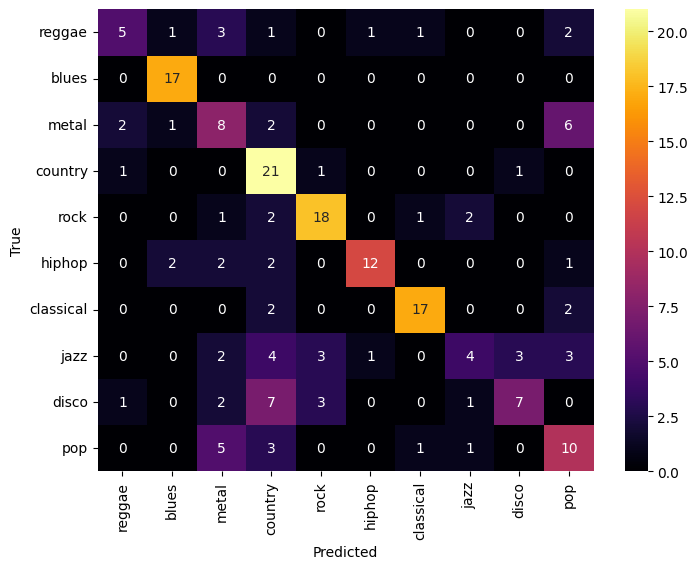

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='inferno', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#2.&nbsp; FMA Dataset

In [ ]:
!cp drive/MyDrive/GoogleCollab/Data/FMA/utils_fma.py .

Import & Data load

In [ ]:
import utils_fma

features = utils_fma.load('/content/drive/MyDrive/GoogleCollab/Data/FMA/features.csv')
tracks = utils_fma.load('/content/drive/MyDrive/GoogleCollab/Data/FMA/tracks.csv')

Data Spliting

In [ ]:
small = tracks['set', 'subset'] <= 'small'

train = tracks['set', 'split'] == 'training'
val = tracks['set', 'split'] == 'validation'
test = tracks['set', 'split'] == 'test'

y_train = tracks.loc[small & train, ('track', 'genre_top')]
y_test = tracks.loc[small & test, ('track', 'genre_top')]
X_train = features.loc[small & train, 'mfcc']
X_test = features.loc[small & test, 'mfcc']

Standarizing features

In [ ]:
scaler = sklearn.preprocessing.StandardScaler(copy=False)
scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[ 2.02407870e+00,  7.28341156e-01,  2.04241274e+00, ...,
        -5.21931263e-01, -8.24199676e-01, -7.80570294e-01],
       [ 1.40072301e-02, -3.89110770e-01, -2.80515927e-01, ...,
         2.49215243e-01,  1.43903422e-01,  7.42925519e-01],
       [-3.27751541e-02, -4.64044606e-01,  1.57717431e-01, ...,
         4.74054870e-02, -6.77014218e-03, -1.44250996e-01],
       ...,
       [-3.04122154e-01, -4.97753390e-01, -8.27489341e-06, ...,
         7.09121936e-01,  2.35810789e+00,  1.56903540e+00],
       [-2.59806394e-01, -2.07064389e-01,  1.37721511e-01, ...,
        -4.98516891e-01,  1.47795198e-01,  2.76447211e-01],
       [-2.95374053e-01, -7.25148255e-01,  3.32040621e-01, ...,
         4.31275266e-02, -1.65205994e-01,  8.37615946e-01]])

Classification models

In [ ]:
for model in models:
  model_classification(models.get(model), X_train, y_train, X_test, y_test)

Accuracy of SGDClassifier(max_iter=5000, random_state=0) : 0.396 

Accuracy of LogisticRegression(multi_class='multinomial', random_state=0) : 0.421 

Accuracy of MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5000, 10), random_state=1,
              solver='lbfgs') : 0.412 

Accuracy of AdaBoostClassifier(n_estimators=1000) : 0.37 

Accuracy of KNeighborsClassifier() : 0.349 

Accuracy of LinearDiscriminantAnalysis() : 0.436 

Accuracy of GaussianNB() : 0.36 

Accuracy of DecisionTreeClassifier() : 0.284 

Accuracy of RandomForestClassifier(max_depth=10, n_estimators=1000, random_state=0) : 0.422 

Accuracy of SVC() : 0.464 

Accuracy of Perceptron(max_iter=2000) : 0.28 

